In [1]:
# %%sh
# pip install statsmodels==0.6.0

In [2]:
import numpy as np
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import os
import math
from matplotlib.ticker import MaxNLocator
from matplotlib import lines
from matplotlib import gridspec
# import statsmodels.stats.api as sms

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.preamble'] = [
    r'\usepackage{wasysym}',
    r'\usepackage{textcomp}']

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 1200


In [3]:
## Defined parameters

linewidth = 3
LIG_min = 120
LIG_max = 125
Hol_min = 4
Hol_max = 7
wspace = 0.05
atl_col = 'r'
pac_col = 'b'
ind_col = 'g'
global_col = 'y'

In [4]:
# Import the data

df_atl_hol = pd.read_csv('Data/Atlantic_Holocene_profile_PL.csv')
df_atl_lig = pd.read_csv('Data/Atlantic_LIG_profile_PL.csv')
df_pac_hol = pd.read_csv('Data/Pacific_Holocene_profile_PL.csv')
df_pac_lig = pd.read_csv('Data/Pacific_LIG_profile_PL.csv')
df_ind_hol = pd.read_csv('Data/Indian_Holocene_profile_PL.csv')
df_ind_lig = pd.read_csv('Data/Indian_LIG_profile_PL.csv')
df_global_hol = pd.read_csv('Data/Global_Holocene_profile_PL.csv')
df_global_lig = pd.read_csv('Data/Global_LIG_profile_PL.csv')

# Import statmodel

df_atl_lig_sm = pd.read_csv('Data/Atlantic_LIG_profile_SM.csv')
df_atl_hol_sm = pd.read_csv('Data/Atlantic_Holocene_profile_SM.csv')

# Combine dataframes

df_atl = pd.concat([df_atl_hol, df_atl_lig])
df_pac = pd.concat([df_pac_hol, df_pac_lig])
df_ind = pd.concat([df_ind_hol, df_ind_lig])
df_global = pd.concat([df_global_hol, df_global_lig])

fontsize = 24

In [5]:
df_atl_hol

,lower,d13C,stdev
0,2.0,0.835195,0.089763
1,3.0,0.813335,0.044519
2,4.0,0.835589,0.046986
3,5.0,0.810873,0.061263
4,6.0,0.792952,0.062562
5,7.0,0.837876,0.090776


In [6]:
# Get the values for the 'peak' of the LIG and Holocene d13C to compare across

df_atl_hol_peak = np.mean(df_atl_hol[(df_atl_hol.lower > Hol_min) & (df_atl_hol.lower < Hol_max)].d13C)
df_pac_hol_peak = np.mean(df_pac_hol[(df_pac_hol.lower > Hol_min) & (df_pac_hol.lower < Hol_max)].d13C)
df_ind_hol_peak = np.mean(df_ind_hol[(df_ind_hol.lower > Hol_min) & (df_ind_hol.lower < Hol_max)].d13C)
df_global_hol_peak = np.mean(df_global_hol[(df_global_hol.lower > Hol_min) & (df_global_hol.lower < Hol_max)].d13C)

df_atl_lig_peak = np.mean(df_atl_lig[(df_atl_lig.lower > LIG_min) & (df_atl_lig.lower < LIG_max)].d13C)
df_pac_lig_peak = np.mean(df_pac_lig[(df_pac_lig.lower > LIG_min) & (df_pac_lig.lower < LIG_max)].d13C)
df_ind_lig_peak = np.mean(df_ind_lig[(df_ind_lig.lower > LIG_min) & (df_ind_lig.lower < LIG_max)].d13C)
df_global_lig_peak = np.mean(df_global_lig[(df_global_lig.lower > LIG_min) & (df_global_lig.lower < LIG_max)].d13C)

# Calculate the delta, and write it on the plot

delta_alt = df_atl_lig_peak - df_atl_hol_peak
delta_pac = df_pac_lig_peak - df_pac_hol_peak
delta_ind = df_ind_lig_peak - df_ind_hol_peak
delta_global = df_global_lig_peak - df_global_hol_peak

text_atl = r'$\Delta\delta^{13}$C='+str(np.trunc(delta_alt*100)/100)+r'$\permil$'
text_pac = r'$\Delta\delta^{13}$C='+str(np.trunc(delta_pac*100)/100)+r'$\permil$'
text_ind = r'$\Delta\delta^{13}$C='+str(np.trunc(delta_ind*100)/100)+r'$\permil$'
text_global = r'$\Delta\delta^{13}$C='+str(np.trunc(delta_global*100)/100)+r'$\permil$'

# Find bounds of data

d13C_min_atl = np.min(df_atl.d13C)
d13C_max_atl = np.max(df_atl.d13C)
d13C_min_pac = np.min(df_pac.d13C)
d13C_max_pac = np.max(df_pac.d13C)
d13C_min_ind = np.min(df_ind.d13C)
d13C_max_ind = np.max(df_ind.d13C)
d13C_min_global = np.min(df_global.d13C)
d13C_max_global = np.max(df_global.d13C)

d13C_min_atl = -(math.trunc(-d13C_min_atl) + math.floor((d13C_min_atl)%1 * 4)/4)
d13C_max_atl = math.trunc(d13C_max_atl) + math.ceil(d13C_max_atl%1 * 4) /4
d13C_min_pac = -(math.trunc(-d13C_min_pac) + math.ceil((-d13C_min_pac)%1 * 4) /4)
d13C_max_pac = math.trunc(d13C_max_pac) + math.ceil(d13C_max_pac%1 * 4) /4
d13C_min_ind = -(math.trunc(-d13C_min_ind) + math.ceil((-d13C_min_ind)%1 * 4) /4)
d13C_max_ind = math.trunc(d13C_max_ind) + math.ceil(d13C_max_ind%1 * 4) /4
d13C_min_global = -(math.trunc(-d13C_min_global) + math.ceil((-d13C_min_global)%1 * 4) /4)
d13C_max_global = math.trunc(d13C_max_global) + math.ceil(d13C_max_global%1 * 4) /4


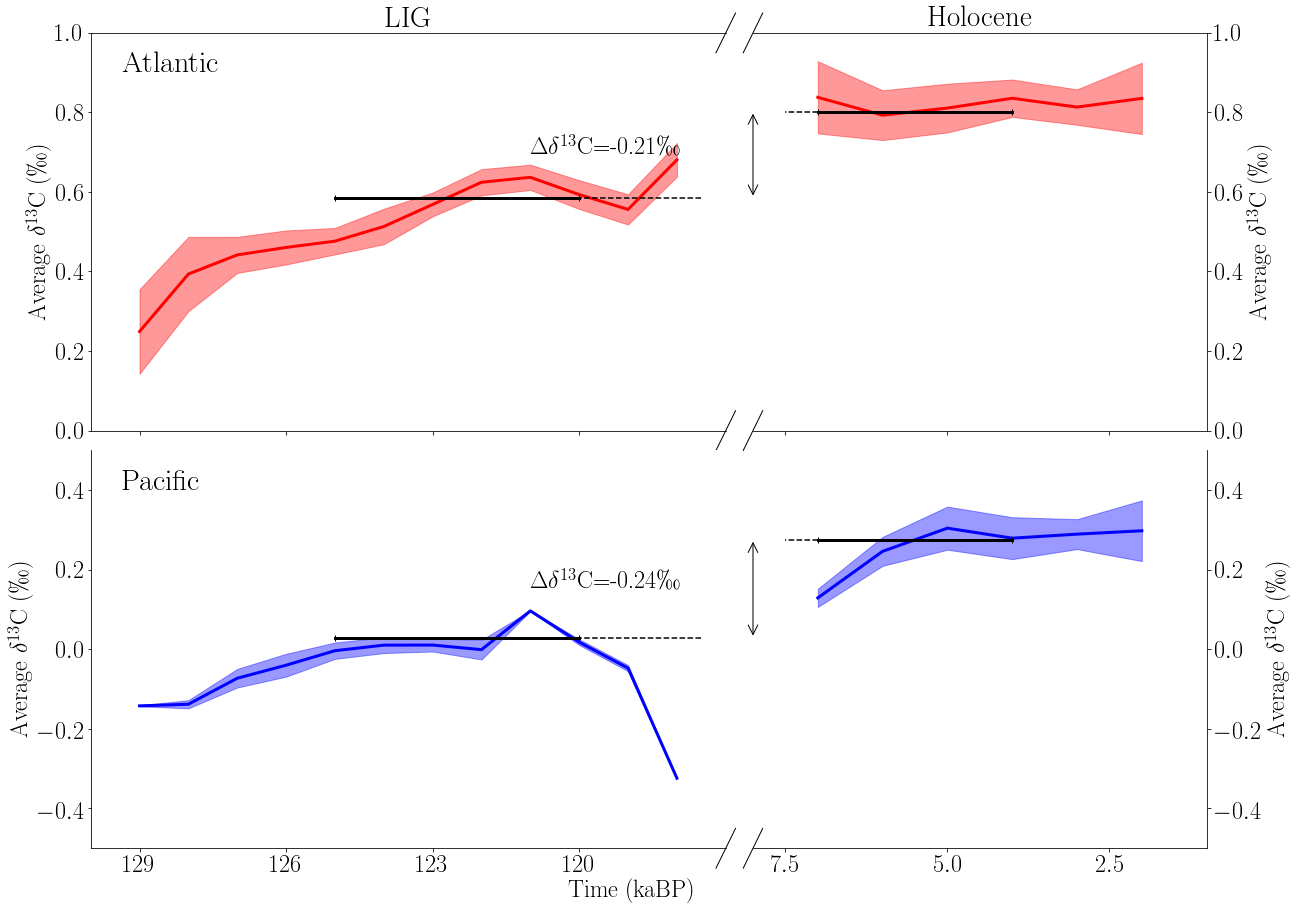

In [7]:

#### Compare the profiles of both the Atlantic and Pacific across the Holocene and the LIG

# Set up the figure

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : fontsize}

matplotlib.rc('font', **font)

gap = 1
width_hol = float((Hol_max - Hol_min + 2*gap))
width_lig = float((LIG_max - LIG_min + 2*gap))

height_1 = float((d13C_max_atl - d13C_min_atl))
height_2 = float((d13C_max_pac - d13C_min_pac))
height_3 = float((d13C_max_ind - d13C_min_ind))
height_4 = float((d13C_max_global - d13C_min_global))

fig = plt.figure(figsize=(20, 15))
plt.subplots_adjust(wspace=0.05,hspace=0.05)
gs = gridspec.GridSpec(2, 2, width_ratios=[width_lig, width_hol],
                       height_ratios=[height_1,height_2]) 

ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax4 = plt.subplot(gs[3])

### Plot mean d13C profiles over time

ax2.plot(df_atl_hol.lower, df_atl_hol.d13C,c=atl_col,linewidth=linewidth)
ax4.plot(df_pac_hol.lower, df_pac_hol.d13C,c=pac_col,linewidth=linewidth)

ax1.plot(df_atl_lig.lower, df_atl_lig.d13C,c=atl_col,linewidth=linewidth)
ax3.plot(df_pac_lig.lower, df_pac_lig.d13C,c=pac_col,linewidth=linewidth)

### Put standard deviation around the profiles

ax2.fill_between(df_atl_hol.lower,
                 df_atl_hol.d13C-df_atl_hol.stdev,
                 df_atl_hol.d13C+df_atl_hol.stdev,
                 zorder=-100,
                 color=atl_col,
                 alpha=0.4)

ax1.fill_between(df_atl_lig.lower,
                 df_atl_lig.d13C-df_atl_lig.stdev,
                 df_atl_lig.d13C+df_atl_lig.stdev,
                 zorder=-100,
                 color=atl_col,
                 alpha=0.4)

ax4.fill_between(df_pac_hol.lower,
                 df_pac_hol.d13C-df_pac_hol.stdev,
                 df_pac_hol.d13C+df_pac_hol.stdev,
                 zorder=-100,
                 color=pac_col,
                 alpha=0.4)

ax3.fill_between(df_pac_lig.lower,
                 df_pac_lig.d13C-df_pac_lig.stdev,
                 df_pac_lig.d13C+df_pac_lig.stdev,
                 zorder=-100,
                 color=pac_col,
                 alpha=0.4)

# Black bar showing the average

ax2.plot([Hol_min, Hol_max], [df_atl_hol_peak, df_atl_hol_peak], 'k|',
        [Hol_min, Hol_max], [df_atl_hol_peak, df_atl_hol_peak], 'k',linewidth=linewidth)
ax1.plot([LIG_min, LIG_max], [df_atl_lig_peak, df_atl_lig_peak], 'k|',
        [LIG_min, LIG_max], [df_atl_lig_peak, df_atl_lig_peak], 'k',linewidth=linewidth)

ax4.plot([Hol_min, Hol_max], [df_pac_hol_peak, df_pac_hol_peak], 'k|',
         [Hol_min, Hol_max], [df_pac_hol_peak, df_pac_hol_peak], 'k',linewidth=linewidth)
ax3.plot([LIG_min, LIG_max], [df_pac_lig_peak, df_pac_lig_peak], 'k|',
        [LIG_min, LIG_max], [df_pac_lig_peak, df_pac_lig_peak], 'k',linewidth=linewidth)

# Set the xlims

for ax in [ax1,ax3]:
    ax.set_xlim(df_atl_lig.lower.max()+1, df_atl_lig.lower.min()-1)
    ax.spines['right'].set_visible(False)
    ax.set_ylabel(r'Average $\delta^{13}$C ($\permil$)')
    
for ax in [ax2,ax4]:
    ax.set_xlim(df_atl_hol.lower.max()+1, df_atl_hol.lower.min()-1)
    ax.yaxis.tick_right()
    ax.spines['left'].set_visible(False)
    ax.yaxis.set_label_position('right')    
    
for ax in [ax1,ax2]:
    ax.set_xticklabels([])
    
for ax in [ax3,ax4]:
    ax.spines['top'].set_visible(False)
    
ax2.set_ylabel('Average $\delta^{13}$C ($\permil$)')
ax4.set_ylabel('Average $\delta^{13}$C ($\permil$)')


# Define the gap between the two plots

space = wspace*(np.diff(ax1.get_xlim()) + np.diff(ax2.get_xlim()))/2
plt.subplots_adjust(wspace=wspace)

## Black dotted line drawing to the middle

ax2.plot([Hol_max, ax2.get_xlim()[0]+space], [df_atl_hol_peak, df_atl_hol_peak], 'k--')
ax4.plot([Hol_max, ax2.get_xlim()[0]+space], [df_pac_hol_peak, df_pac_hol_peak], 'k--')

ax1.plot([ax1.get_xlim()[1]-space, LIG_min], [df_atl_lig_peak, df_atl_lig_peak], 'k--')
ax3.plot([ax1.get_xlim()[1]-space, LIG_min], [df_pac_lig_peak, df_pac_lig_peak], 'k--')

# Label differences

ax1.text(ax1.get_xlim()[1]+4,np.mean([df_atl_hol_peak, df_atl_lig_peak]), text_atl)
ax3.text(ax1.get_xlim()[1]+4,np.mean([df_pac_hol_peak, df_pac_lig_peak]), text_pac)

# Adjust the axes and format graph

for ax in [ax1,ax2]:
    ax.set_ylim(d13C_min_atl, d13C_max_atl)
    
for ax in [ax3,ax4]:
    ax.set_ylim(d13C_min_pac, d13C_max_pac)  
    
for ax in [ax2,ax4]:
    ax.get_xaxis().set_major_locator(MaxNLocator(nbins=(Hol_max-Hol_min),prune='both'))
    
for ax in [ax1,ax3]:
    ax.get_xaxis().set_major_locator(MaxNLocator(nbins=(LIG_max-LIG_min),prune='both'))    

# Add the delta arrows

ax2.annotate(s='', xy=(ax2.get_xlim()[0],df_atl_hol_peak), xytext=(ax2.get_xlim()[0],df_atl_lig_peak), arrowprops=dict(arrowstyle='<->'))
ax4.annotate(s='', xy=(ax4.get_xlim()[0],df_pac_hol_peak), xytext=(ax4.get_xlim()[0],df_pac_lig_peak), arrowprops=dict(arrowstyle='<->'))
# label the axes

# ttl = plt.suptitle('Average $\delta^{13}$C ($\permil$) for the Holocene and LIG, Atlantic and Pacific Oceans')
# ttl.set_position([.5, 0.95])

ax2.set_title('Holocene')
ax1.set_title('LIG')

fig.text(0.5, 0.08, 'Time (kaBP)', ha='center')

### Add in breaks in axis

d1 = 0.15
d2 = 0.2

hol_x = ax2.get_xlim()[0]
lig_x = ax1.get_xlim()[1]

y_frac = np.diff(ax1.get_ylim())*0.05

for x,ax,d in zip([hol_x,lig_x,hol_x,lig_x],
                  [ax2,ax1,ax4,ax3],
                  [d1,d2,d1,d2]
                 ):

    y_min = ax.get_ylim()[0]

    line = lines.Line2D([loc+x for loc in [-d,d]],
             [y_min+y_frac,y_min-y_frac],c='k',linewidth=1)
    
    line.set_clip_on(False)
    ax.add_line(line)  

# Run for just top x axis
y_max = ax2.get_ylim()[1]
    
line = lines.Line2D([loc+hol_x for loc in [-d1,d1]],
         [y_max+y_frac,y_max-y_frac],c='k',linewidth=1)
line.set_clip_on(False)
ax2.add_line(line)   
line = lines.Line2D([loc+lig_x for loc in [-d2,d2]],
         [y_max+y_frac,y_max-y_frac],c='k',linewidth=1)
line.set_clip_on(False)
ax1.add_line(line)

# Label plots

ax1.text(ax1.get_xlim()[0] + 0.05*np.diff(ax1.get_xlim()),ax1.get_ylim()[1] - 0.1*np.diff(ax1.get_ylim()),
         'Atlantic',
        color='k',fontsize=30)
ax3.text(ax3.get_xlim()[0] + 0.05*np.diff(ax3.get_xlim()),ax3.get_ylim()[1] - 0.1*np.diff(ax3.get_ylim()),
         'Pacific',
        color='k',fontsize=30)

# Plot the graph

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : fontsize}

matplotlib.rc('font', **font)

plt.savefig('Figures/global_volume_weights_presentation.png',bbox_inches='tight',dpi=500)

plt.show()
